In [1]:
import glacierml as gl
import pandas as pd
pd.set_option('display.max_columns', None)

2023-07-09 12:18:26.844046: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-09 12:18:26.886998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 12:18:27.566963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
for i in (range(0,900,100)):
    print(i)

0
100
200
300
400
500
600
700
800


In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
def plot_data(
    size_thresh_1 = 1e-5, size_thresh_2 = 1e4,
    analysis = 'vol',
    log = True, ticks = True
):
    (
        x,y,z,unc,
        x_new,y_new,z_new,unc_new ,
        far_ind, est_ind ,unc_ind
    ) = gl.assign_arrays(
        parameterization = '4',method = '1',
        analysis = analysis,
        size_thresh_1 = size_thresh_1, size_thresh_2 = size_thresh_2
    )

    fig, ax = plt.subplots(figsize = (10,10))
    plt.scatter(x_new, y_new, c = z_new, cmap = 'viridis', marker = '.')
    plt.plot(
        (size_thresh_1,size_thresh_2),(size_thresh_1,size_thresh_2), 'orange', linewidth = 3
    )
    
    if log == True:
        plt.xscale('log')
        plt.yscale('log')

#     plt.axis('square')
    if ticks == True:
        import numpy as np
        major_ticks = np.logspace(-5,4,10)

        plt.xticks(major_ticks)
        plt.yticks(major_ticks)

density array found
threshold density array found


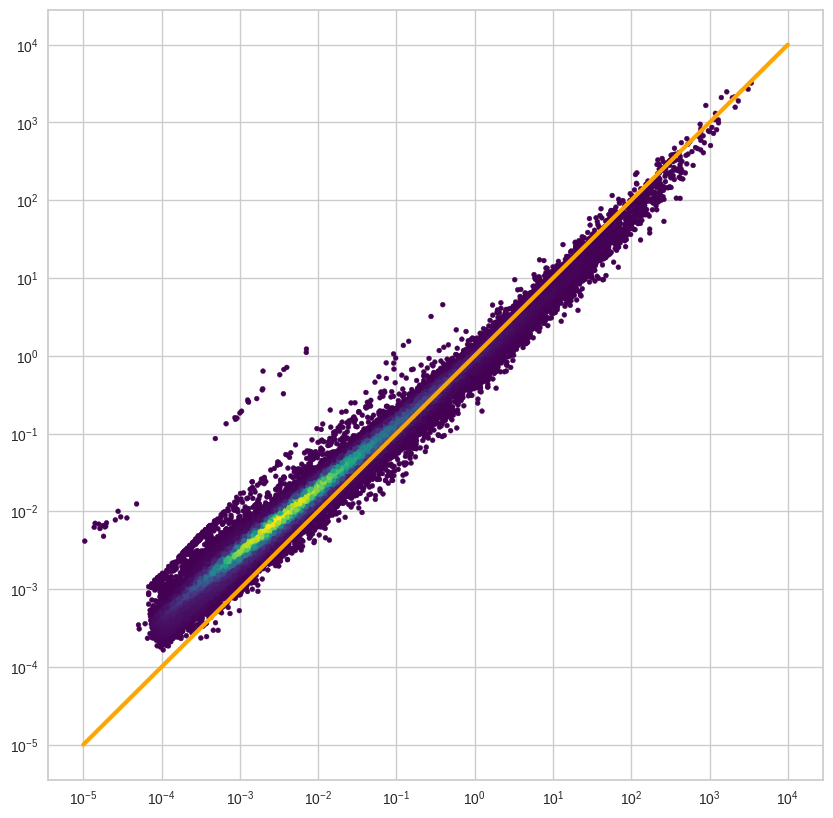

In [16]:
plot_data(
    size_thresh_1 = 1e-5, size_thresh_2 = 1e4,
    analysis = 'vol', log = True, ticks = True
)

In [22]:
plot_data(
    size_thresh_1 = 1e-3, size_thresh_2 = 1e0,
    analysis = 'vol', log = True, ticks = False
)

density array found
calculating density of desired threshold


KeyboardInterrupt: 